Costruire una ANN per classificazione binaria con TF

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [8]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
X[:, 1] = le.fit_transform(X[:, 1])

Per le nazioni utilizziamo un One-Hot encoder poichè un encoder classico come LabelEncoder potrebbe introdurre un bias nella rete poichè assegnerebbe numeri crescenti alle label, un one-hot encoder invece non provoca questo effetto


In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
print(X_train)

[[0.0 0.0 1.0 ... 1 0 163830.64]
 [0.0 1.0 0.0 ... 1 1 57098.0]
 [1.0 0.0 0.0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]


Effettuo uno scaling per evitare che le colonne con valore più alto possano sormontare le colonne con valore più basso, portando le features ad avere la stessa valenza iniziale

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


Per costruire la rete prendiamo le funzioni di attivazione relu (rectifier) poichè sono quelle più usate per costruire reti artificiali per i livelli nascosti.
Il numero di neuroni invece può essere considerato un iperparameto da ottimizzare, in questo caso euristicamente è stato scelto 6

In [15]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Utilizzo la binary_crossentropy poichè è un problema di classificazione binaria, se avessi più classi posso usare la softmax

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test, y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6860 - loss: 0.6219 - val_accuracy: 0.7980 - val_loss: 0.5036
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7913 - loss: 0.4972 - val_accuracy: 0.8060 - val_loss: 0.4577
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8002 - loss: 0.4564 - val_accuracy: 0.8085 - val_loss: 0.4328
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.4287 - val_accuracy: 0.8130 - val_loss: 0.4243
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4294 - val_accuracy: 0.8210 - val_loss: 0.4207
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8105 - loss: 0.4293 - val_accuracy: 0.8245 - val_loss: 0.4182
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.4181 - val_accuracy: 0.8230 - val_loss: 0.4160
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4265 - val_accu

In [18]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

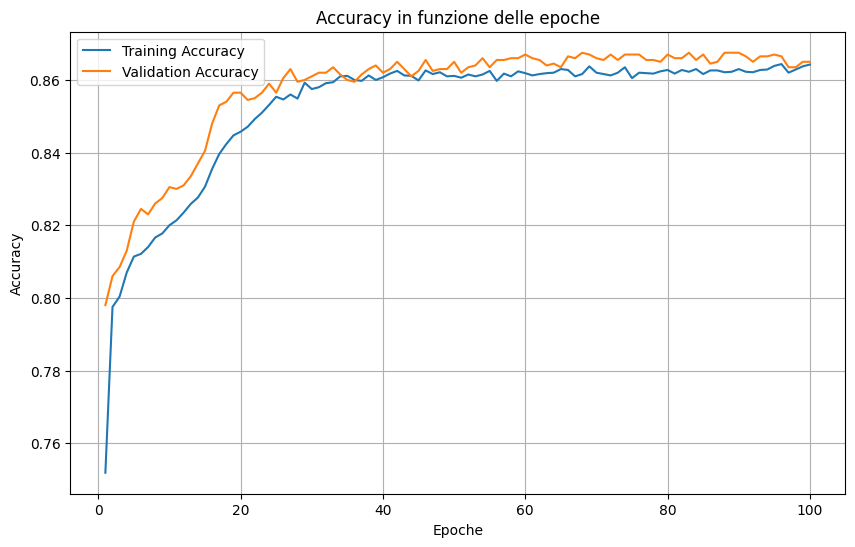

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.title('Accuracy in funzione delle epoche')
plt.legend()
plt.grid(True)
plt.show()

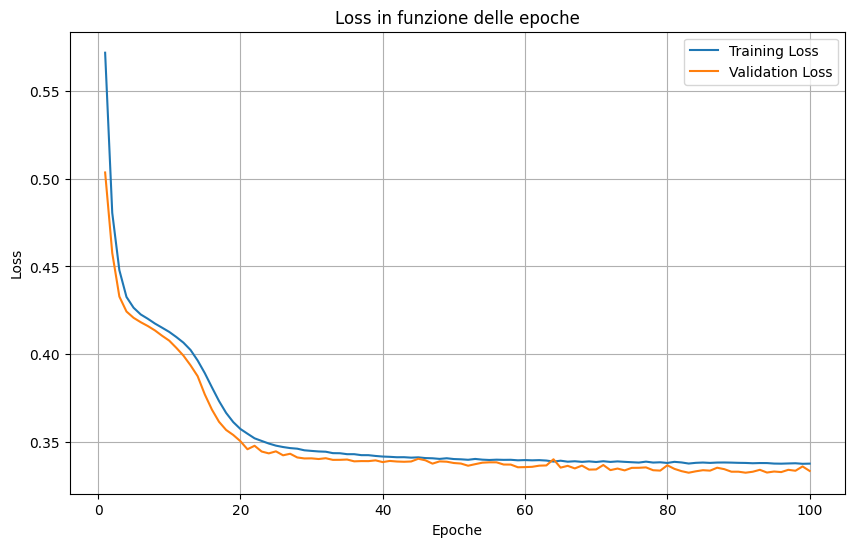

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Loss in funzione delle epoche')
plt.legend()
plt.grid(True)
plt.show()

Possiamo anche generare la matrice di confusione

In [21]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1514   81]
 [ 189  216]]


0.865